# **<u>Introduction</u>**
Name: Ian Samoei 

Registration Number: P15/1898/2022


## **<u>Problem Overview</u>**
The task is to create a neural network that can recognise at least 4 digits from the MNIST dataset with high accuracy (>95%). The MNIST dataset contains 60,000 handwritten numbers along with their respective labels (Training set). The dataset also contains 10,000 images along with their labels for the purposes of testing (Test Dataset). The images are in a MNIST consists of grayscale (black and white ) images of size [28 × 28] pixels with each pixel value in the range [0, 255], O representing completely black while 255 representing a white pixel. The labels range between 0 - 9 representing the 10 decimal digits.

## **<u>Technical Overview</u>**
In order to solve this, we will create a multilayered neural network that we can train to recognize the images. 
The layers are:
### 1. Input Layer
The input layer will accept a 28 x 28 vector which represents the pixel values in each image. This leads to an input of a 784 dimensional vector.
### 2. Hidden Layer
It will be the layer in between the input and output and will use the ReLU activation function.
### 3. Output Layer
10 neurons (one for each digit), using the SoftMax activation function to output probabilities.

## <u>Step 1 : Preparing Data</u>



## Understanding the Data
Below is a picture of the first 25 images in the dataset.(Internet Image)
![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

The images are 28 x 28 pixels, and each pixel is a grayscale value between 0 and 255. The labels are numbers between 0 and 9, representing the digits drawn in the images. The data was collected from the National Institute of Standards and Technology (NIST) and modified to form the MNIST dataset. The dataset is split into two parts: 60,000 training images and 10,000 testing images. The data was collected from American Census Bureau employees and high school students.

In [6]:
#Importing the necessary libraries
import numpy as np
import struct

#Function to load the images
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))#Read the first 16 bytes
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows * cols)#Read the rest
    return images / 255.0  # Normalize to range [0, 1]
#Function to load the labels
def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))#Read the first 8 bytes
        labels = np.fromfile(f, dtype=np.uint8)#Read the rest
    return labels

#Load the images
x_train = load_mnist_images('train-images.idx3-ubyte')
y_train = load_mnist_labels('train-labels.idx1-ubyte')
x_test = load_mnist_images('t10k-images.idx3-ubyte')
y_test = load_mnist_labels('t10k-labels.idx1-ubyte')

# Function to one-hot encode the labels
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

#One-hot encode the labels
y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

# <u>Step 2: Defining the Neural Network</u>

In [7]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros(output_size)

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_derivative(x):
        return (x > 0).astype(float)

    @staticmethod
    def softmax(x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability improvement
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    @staticmethod
    def cross_entropy_loss(predictions, labels):
        return -np.mean(np.sum(labels * np.log(predictions + 1e-9), axis=1))  # Avoid log(0)

    def forward(self, x):
        # Forward pass
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.relu(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.softmax(self.output_input)
        return self.output

    def backward(self, x, y, predictions):
        # Output layer gradient
        output_error = predictions - y
        d_weights_hidden_output = np.dot(self.hidden_output.T, output_error)
        d_bias_output = np.sum(output_error, axis=0)

        # Hidden layer gradient
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.relu_derivative(self.hidden_input)
        d_weights_input_hidden = np.dot(x.T, hidden_error)
        d_bias_hidden = np.sum(hidden_error, axis=0)

        # Update weights and biases
        self.weights_hidden_output -= self.learning_rate * d_weights_hidden_output
        self.bias_output -= self.learning_rate * d_bias_output
        self.weights_input_hidden -= self.learning_rate * d_weights_input_hidden
        self.bias_hidden -= self.learning_rate * d_bias_hidden

    def train(self, x, y, epochs=10, batch_size=64):
        for epoch in range(epochs):
            indices = np.arange(x.shape[0])
            np.random.shuffle(indices)
            x = x[indices]
            y = y[indices]
            
            for i in range(0, x.shape[0], batch_size):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                
                predictions = self.forward(x_batch)
                self.backward(x_batch, y_batch, predictions)
            
            # Compute loss
            predictions = self.forward(x)
            loss = self.cross_entropy_loss(predictions, y)
            print(f"Epoch {epoch+1}, Loss: {loss:.4f}")


## <u>Step 3: Training and Evaluation</u>
In this step, we will train the neural network using the training data and evaluate its performance using the test data.
After training the model, we will evaluate its performance using the test data. We will calculate the accuracy of the model on the test data and plot the confusion matrix to see how well the model is performing for each digit.

In [8]:
# Initialize the neural network
nn = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, learning_rate=0.01)

# Train the network
nn.train(x_train, y_train, epochs=10, batch_size=64)

# Evaluate on test data
predictions = nn.forward(x_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1, Loss: 0.1117
Epoch 2, Loss: 0.0806
Epoch 3, Loss: 0.0488
Epoch 4, Loss: 0.0429
Epoch 5, Loss: 0.0291
Epoch 6, Loss: 0.0309
Epoch 7, Loss: 0.0194
Epoch 8, Loss: 0.0149
Epoch 9, Loss: 0.0118
Epoch 10, Loss: 0.0090
Test Accuracy: 98.12%


Confusion Matrix:
[[ 974    1    1    0    1    0    1    1    1    0]
 [   0 1124    2    1    0    1    3    0    4    0]
 [   1    3 1009    4    2    0    5    2    6    0]
 [   1    1    1  996    0    2    0    3    4    2]
 [   0    0    5    0  963    0    4    0    1    9]
 [   2    0    0   12    1  870    2    0    3    2]
 [   4    3    3    1    5    4  937    0    1    0]
 [   1    1   11    5    0    0    0  997    6    7]
 [   5    0    3    4    0    2    1    3  955    1]
 [   2    2    0    1    7    2    0    5    3  987]]


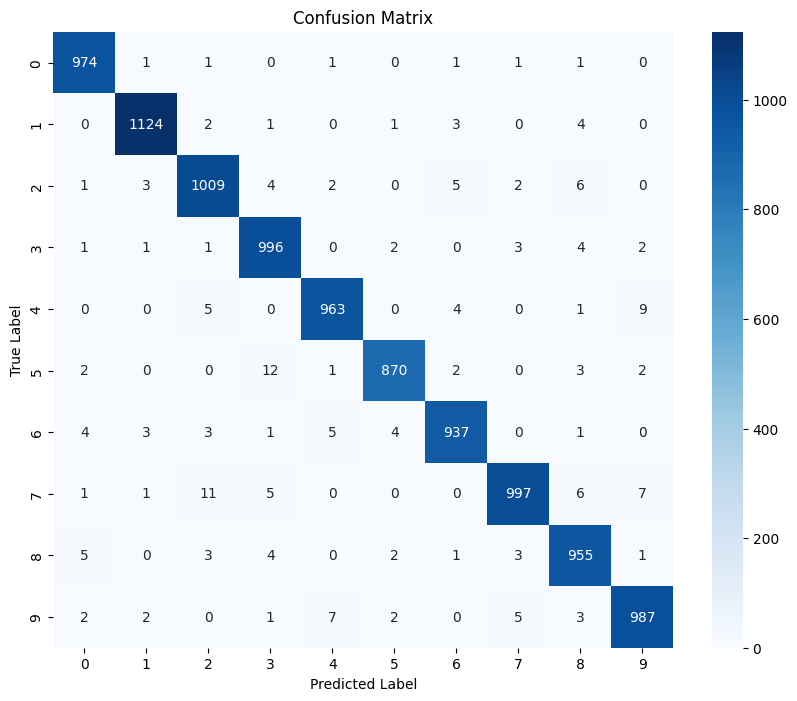

In [9]:
# Get predictions for the test set
predictions = nn.forward(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
def compute_confusion_matrix(true_labels, predicted_labels, num_classes=10):
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(true_labels, predicted_labels):
        confusion_matrix[true, pred] += 1
    return confusion_matrix

conf_matrix = compute_confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

class_names = [str(i) for i in range(10)]  # Class names for digits 0-9
plot_confusion_matrix(conf_matrix, class_names)

## Secondary Evaluation
Now that our neural network has a relatively high accuracy of ~ 97%, we need to check if it satisfies the conditions we had at the beginning of the notebook, which was making sure that it can recognise at least 4 images accurately. 